# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0303 Смирнов Артем и Переверза Михаил. Вариант №2.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.



## Основные теоретические положения

Единичный цифровой импульс: $$\delta_d(k) = \begin{cases}1, & k = 0,\\0, & k \neq 0.\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

Дискретный единичный скачок: $$\sigma_d(k) = \begin{cases}1, & k\geq0,\\ 0,& k < 0.\end{cases}, k = ..., -2, -1, 0, 1, 2,...$$

Дискретная экспоненциальная функция: $$s(k) = \begin{cases}0, & k < 0,\\ a^k, & k \ge 0\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

Дискретный комплексный гармонический сигнал $$s_2(k)=C\exp(j\hatω_0k)$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.



## Выполнение работы

Пункты работы выполняются с помощью кода.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [7]:
Nb = 2
N = 30 + np.mod(Nb, 5)
T = 0.0005 * (1 + np.mod(Nb, 3))
a = np.power(-1, Nb) * (0.8 + 0.005 * np.mod(Nb, 20))
C = 1 + np.mod(Nb, 5)
w0 = np.pi / (6 + np.mod(Nb, 5))
m = 5 + np.mod(Nb, 5)

### Пункт 1
Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$. Пояснить:
- взаимосвязь между дискретным и дискретным нормированным временем;
- различие между единичным цифровым импульсом и дельта-функцией.

Поянение:
* Дискретное нормированное время $n$ есть дискретное время $nT$, где $T \equiv 1$: $$x(nT)=x(n)$$
* Длительность дельта-функция бесконечно мала, а ее амплитуда бесконечно велика. Для единичного цифрового импульса достаточно, чтобы длительность импульса была много меньше постоянной времени цепи.

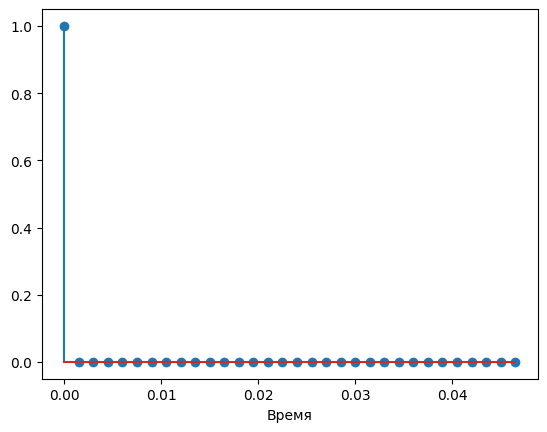

In [8]:
delta = signal.unit_impulse(N)
time = np.linspace(0, (N - 1) * T, N)

plt.stem(time, delta)
plt.xlabel("Время")
plt.show()

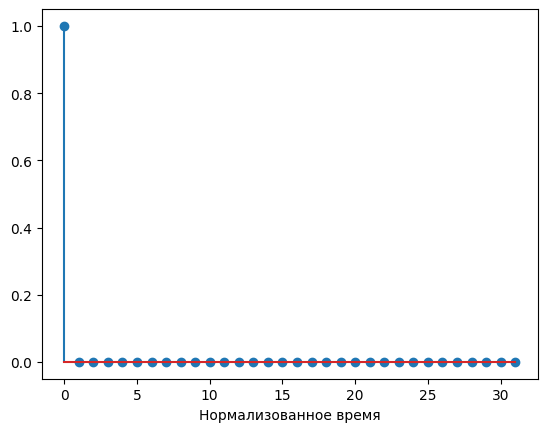

In [9]:
normalized_time = np.linspace(0, N - 1, N)

plt.stem(normalized_time, delta)
plt.xlabel("Нормализованное время")
plt.show()

# Пункт 2
Смоделировать дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$. Пояснить:
- соответствие между дискретным и аналоговым единичными скачками;
- чему равна частота дискретизации дискретного единичного скачка.

Пояснение:
* Аналоговый сигнал в действительности может быть аппроксимирован суммой единичных скачков, которые происходят в различные последовательные моменты времени. Если мы уменьшим до нуля интервал времени между каждым скачком, то в пределе получим точную форму исходного сигнала.

* частота дискретизации дискретного единичного скачка равна $$f_Д=\frac{1}{T}$$

Смоделируем дискретный единый скачок

$$\sigma_d(k)=
\begin{cases}
    \displaystyle 1,       & \quad k \geq 0\\
    0  & \quad k < 0
  \end{cases}$$

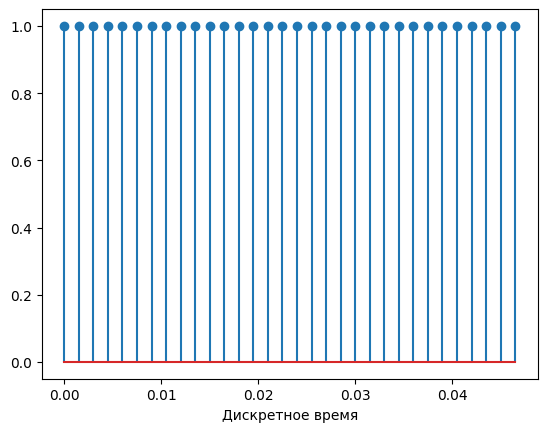

In [10]:
sigma = np.heaviside(np.arange(0, N), 1)
time = np.linspace(0, (N - 1) * T, N)

plt.stem(time, sigma)
plt.xlabel("Дискретное время")
plt.show()

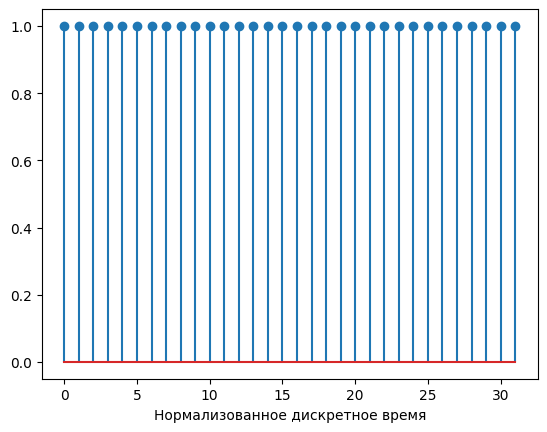

In [11]:
normalized_time = np.linspace(0, N - 1, N)

plt.stem(normalized_time, sigma)
plt.xlabel("Нормализованное дискретное время")
plt.show()

В нашем случае частота дискретное единичного скачка равна:
$$f_d \geq 2\cdot f_d$$

In [12]:
f_d = round(1/T, 3)
print(f'{f_d=}')

f_d=666.667


$$f_d = 666.667$$

### Пункт 3
Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$.
Пояснить:

- соответствие между дискретной и аналоговой экспонентами.



Пояснение:
* Дискретная экспоненцильная функция и аналоговая экпоненциальная функция принимают значения $a^x$ , однако дискретная экспоненциальная функция при значениях аргумента меньше 0 равна 0.

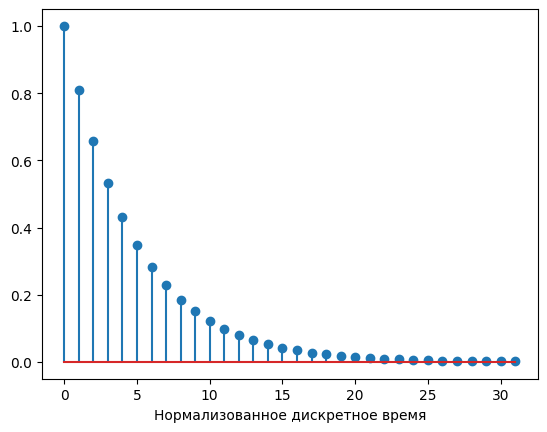

In [13]:
normalized_time = np.linspace(0, (N - 1), N)
s = np.array([np.power(a, k) if k >=0 else 0 for k in normalized_time])

plt.stem(normalized_time, s)
plt.xlabel("Нормализованное дискретное время")
plt.show()

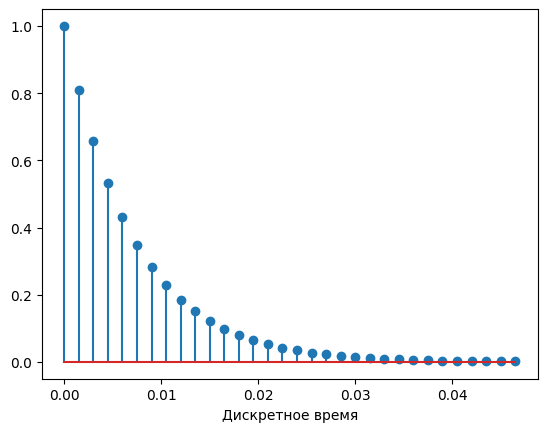

In [14]:
time = np.linspace(0, (N - 1)* T, N)

plt.stem(time, s)
plt.xlabel("Дискретное время")
plt.show()

### Пункт 4
Смоделировать дискретный комплексный гармонический сигнал $s_2(k)=C\exp(j\hatω_0k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0,N−1]$.

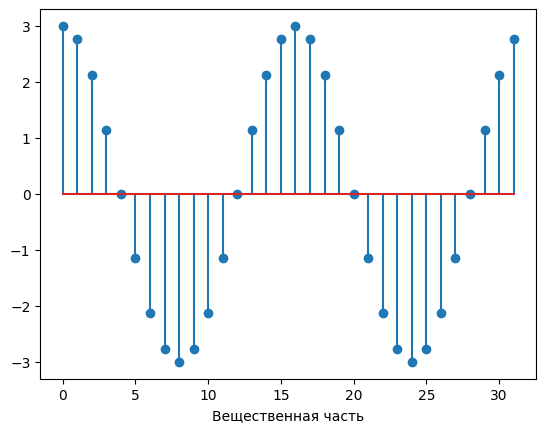

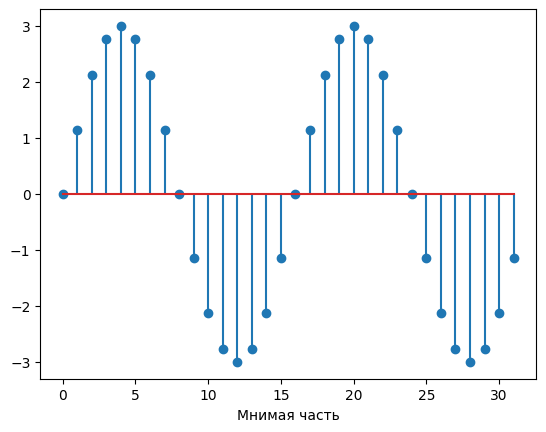

In [15]:
s2 = lambda k : C*np.exp(w0*k*1j) # дискретный комплексный гармонический сигнал
x = np.arange(0, N) # интервал времени от 0 до N - 1
y = s2(np.arange(0, N))

plt.stem(x, y.real)
plt.xlabel("Вещественная часть")
plt.show()

plt.stem(x, y.imag)
plt.xlabel("Мнимая часть")
plt.show()

Записать данный сигнал в виде комбинации двух вещественных последовательностей.

$$s_2(k)=C\exp(j\hatω_0k) = C(cos(\hatω_0k) + sin(\hatω_0k)j)$$

### Пункт 5
Вывести графики последовательностей $\delta_d(k)$, $\sigma_d(k)$, $s_1(k)$, задержанных на $m$ отсчетов, на интервале времени $n \in [0, N-1]$.

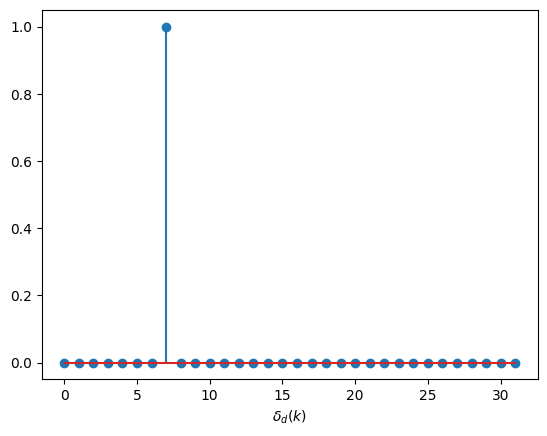

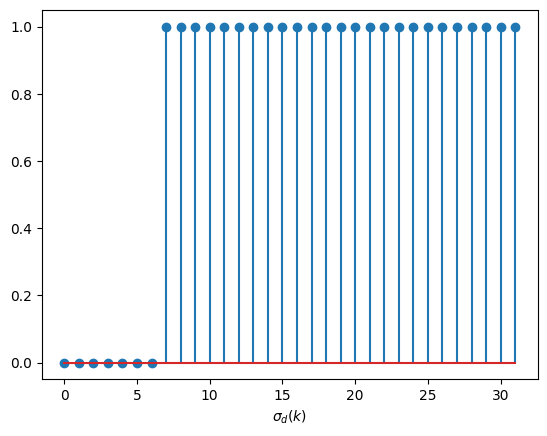

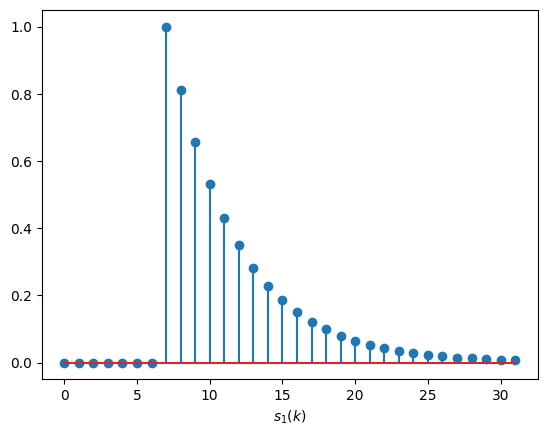

In [16]:
delta_d = lambda k: k == 0
sigma_d = lambda k: (k >= 0)
s1 = lambda k: (k >= 0)*(a)**(k)

x = np.arange(0, N)

plt.stem(x, delta_d(x-m))
plt.xlabel("$\delta_d(k)$")
plt.show()

plt.stem(x, sigma_d(x-m))
plt.xlabel("$\sigma_d(k)$")
plt.show()

plt.stem(x, s1(x-m))
plt.xlabel("$s_1(k)$")
plt.show()

Записать формулы задержанных последовательностей.


Единичный импульс

 $$\delta_d(k-m) = \begin{cases}
 1, & k = m\\0,
 & k \neq m
 \end{cases}
 $$

 Единичный скачок

$$\sigma_d(k-m) = \begin{cases}
 1, & k \ge m\\0,
 & k < m
 \end{cases}
$$


Дискретная экспоненциальная функция
$$s_1(k-m) = \begin{cases}
a^{k-m}, & k \ge m\\0,
 & k < m
 \end{cases}
$$

## Выводы

В ходе выполнения лабораторной работы было изучено математическое описание стандартных дискретных сигналов, смоделированы: единичный цифровой импульс, дискретный цифровой скачок, дискретная экспоненциальная функция и дискретный комплексный гармоничный сигнал. С помощью программных средств языка python было произведено моделирование, анализ стандартных дискретных последовательностей и выведены графики моделей.
